In [16]:
from sklearnex import patch_sklearn 

patch_sklearn()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import module as mod

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# 1. Import et nettoyage des données

In [2]:
house1_power_blk2 = mod.load_dataset('data/house1_power_blk2_labels.zip')
house1_power_blk2.head()

,mains,activity,hour
datetime,,,
2016-03-06 00:00:00,473.0,0,0.0
2016-03-06 00:00:01,474.0,0,0.0
2016-03-06 00:00:02,476.0,0,0.0
2016-03-06 00:00:03,476.0,0,0.0
2016-03-06 00:00:04,475.0,0,0.0


In [3]:
house2_power_blk1 = mod.load_dataset('data/house2_power_blk1_labels.zip')
house2_power_blk1.head()

,mains,activity,hour
datetime,,,
2017-09-12 23:00:00,103.0,0,23.0
2017-09-12 23:00:01,101.0,0,23.0
2017-09-12 23:00:02,104.0,0,23.0
2017-09-12 23:00:03,104.0,0,23.0
2017-09-12 23:00:04,105.0,0,23.0


In [4]:
windows = ['1h', '5min']

features_col = ['mains', 'hour']
for window in windows:
    house1_power_blk2, cols = mod.generate_features(house1_power_blk2, window=window)
    house2_power_blk1, cols = mod.generate_features(house2_power_blk1, window=window)
    features_col += cols

# 2. Algorithmes généraux : house 1 vs house 2

In [5]:
scaler = StandardScaler()
sample_idx = mod.pick_random_indexes(house2_power_blk1, 0.3)
X_train = scaler.fit_transform(house1_power_blk2[features_col].values)
X_test = scaler.transform(house2_power_blk1.loc[sample_idx, features_col].values)

y_train = house1_power_blk2['activity'].values
y_test = house2_power_blk1.loc[sample_idx, 'activity'].values

Score f_beta : 65.801%
Score accuracy : 66.630%


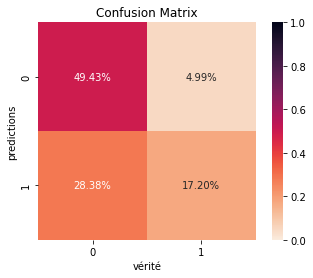

In [8]:
knn = KNeighborsClassifier(n_neighbors=90, n_jobs=-1)
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

Score f_beta : 63.009%
Score accuracy : 64.925%


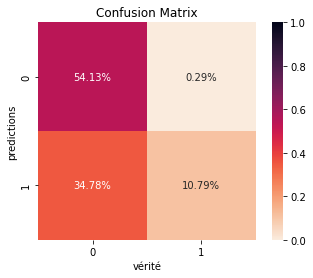

In [9]:
rfc = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_samples=0.9, max_depth=12)
rfc.fit(X_train, y_train.ravel())
y_pred = rfc.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

Score f_beta : 64.408%
Score accuracy : 65.704%


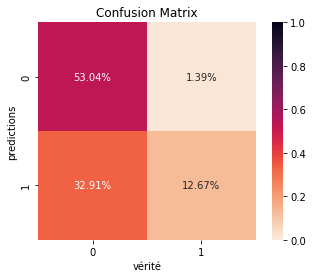

In [10]:
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train.ravel())
y_pred = hgbc.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

# 3. Algorithmes généraux : house 2 vs house 1
## 3.1 Scaler fitté sur la maison 2

In [5]:
scaler = MinMaxScaler()
sample_idx = mod.pick_random_indexes(house1_power_blk2, 0.3)
X_train = scaler.fit_transform(house2_power_blk1[features_col].values)
# Attention : ici on re-fit le scaler sur les données de la maison 2 (test)
X_test = scaler.transform(house1_power_blk2.loc[sample_idx, features_col].values)

y_train = house2_power_blk1['activity'].values
y_test = house1_power_blk2.loc[sample_idx, 'activity'].values

Score f_beta : 59.109%
Score accuracy : 59.319%


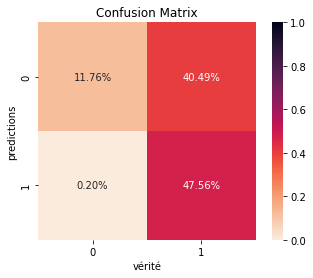

In [6]:
knn = KNeighborsClassifier(n_neighbors=90, n_jobs=-1)
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

Score f_beta : 26.686%
Score accuracy : 47.759%


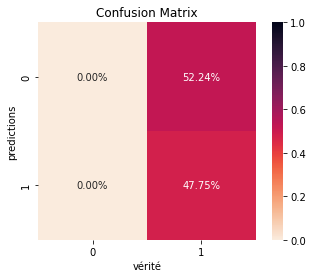

In [7]:
rfc = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_samples=0.9, max_depth=12)
rfc.fit(X_train, y_train.ravel())
y_pred = rfc.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

Score f_beta : 27.611%
Score accuracy : 47.269%


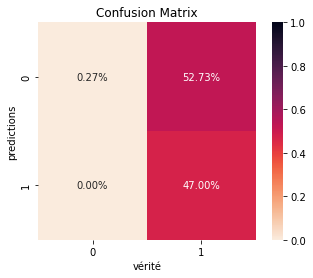

In [9]:
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train.ravel())
y_pred = hgbc.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

## 3.2 Scaler fitté sur la maison 1
Essayons avec une fenêtre de 7 jour avec un ```MinMaxScaler```

In [9]:
scaler = MinMaxScaler()
sample_idx = mod.pick_random_indexes(house1_power_blk2, 0.3)
X_train = scaler.fit_transform(house2_power_blk1[features_col].values)
# Attention : ici on re-fit le scaler sur les données de la maison 1 (test) sur 7 jours
scaler.fit(house1_power_blk2.iloc[:24*60*60*7,:].loc[:, features_col].values)
X_test = scaler.transform(house1_power_blk2.loc[sample_idx, features_col].values)

y_train = house2_power_blk1['activity'].values
y_test = house1_power_blk2.loc[sample_idx, 'activity'].values

Score f_beta : 75.084%
Score accuracy : 74.337%


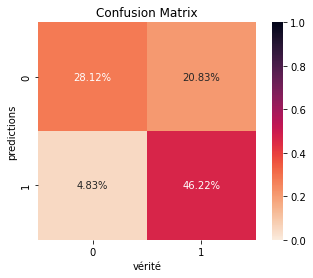

In [10]:
knn = KNeighborsClassifier(n_neighbors=90, n_jobs=-1)
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

Score f_beta : 76.405%
Score accuracy : 74.827%


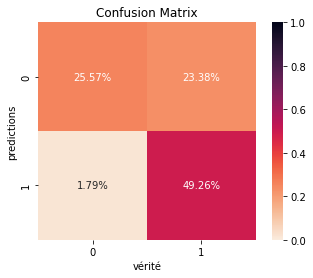

In [11]:
rfc = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_samples=0.9, max_depth=12)
rfc.fit(X_train, y_train.ravel())
y_pred = rfc.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

Score f_beta : 75.030%
Score accuracy : 73.480%


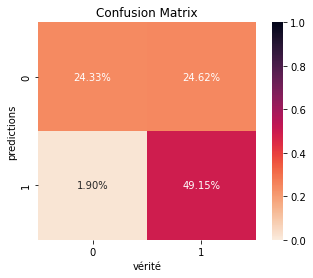

In [13]:
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train.ravel())
y_pred = hgbc.predict(X_test)
mod.plot_confusion_matrix(y_test, y_pred);

On peut essayer plusieurs fenêtres de temps, toujours avec un ```MinMaxScaler``` et un ```RandomForestClassifier```.

In [ ]:
def classif_scale_window(data_train, data_test, window=1, classifier=HistGradientBoostingClassifier(), scaler=MinMaxScaler()):
    
    sample_idx = mod.pick_random_indexes(house1_power_blk2, 0.3)
    X_train = scaler.fit_transform(data_train[features_col].values)
    # Attention : ici on re-fit le scaler sur les données du test
    scaler.fit(data_test.iloc[:24*60*60*window,:].loc[:, features_col].values)
    X_test = scaler.transform(data_test.loc[sample_idx, features_col].values)

    y_train = data_train['activity'].values
    y_test = data_test.loc[sample_idx, 'activity'].values

    classifier.fit(X_train, y_train.ravel())
    y_pred = hgbc.predict(X_test)

    f_beta = fbeta_score(y_test, y_pred, average="macro", beta=0.5)
    acc = accuracy_score(y_test, y_pred)

    return f_beta, acc

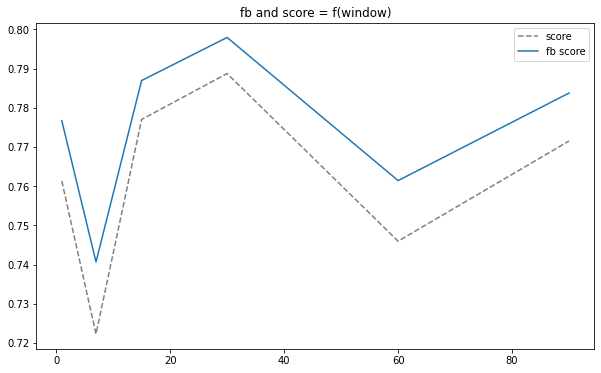

In [18]:
w_range = [1, 7, 15, 30, 60, 90]
fb_score = []
acc_score = []
for w in w_range:
    fb, acc = classif_scale_window(house2_power_blk1, house1_power_blk2, window=w, classifier=RandomForestClassifier(n_estimators=30, n_jobs=-1, max_samples=0.9, max_depth=12))
    fb_score.append(fb)
    acc_score.append(acc)

plt.figure(figsize=(10, 6));
plt.plot(w_range, acc_score, label='score', color='grey', linestyle='dashed');
plt.plot(w_range, fb_score, label='fb score');
plt.legend();
plt.title('fb and score = f(window)');


Essayons avec un ```StandardScaler```.

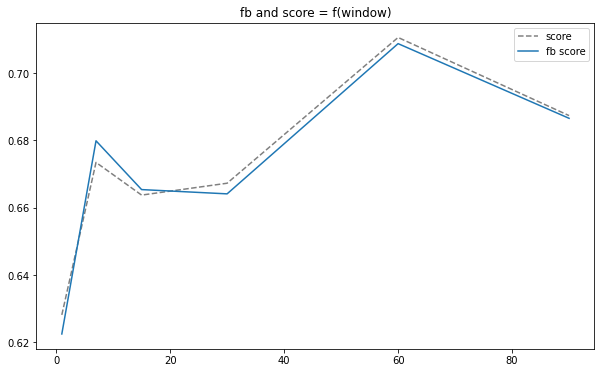

In [19]:
w_range = [1, 7, 15, 30, 60, 90]
fb_score = []
acc_score = []
for w in w_range:
    fb, acc = classif_scale_window(house2_power_blk1, house1_power_blk2, window=w, classifier=RandomForestClassifier(n_estimators=30, n_jobs=-1, max_samples=0.9, max_depth=12), scaler=StandardScaler())
    fb_score.append(fb)
    acc_score.append(acc)

plt.figure(figsize=(10, 6));
plt.plot(w_range, acc_score, label='score', color='grey', linestyle='dashed');
plt.plot(w_range, fb_score, label='fb score');
plt.legend();
plt.title('fb and score = f(window)');


Essayons avec un ```QuantileTransformer```

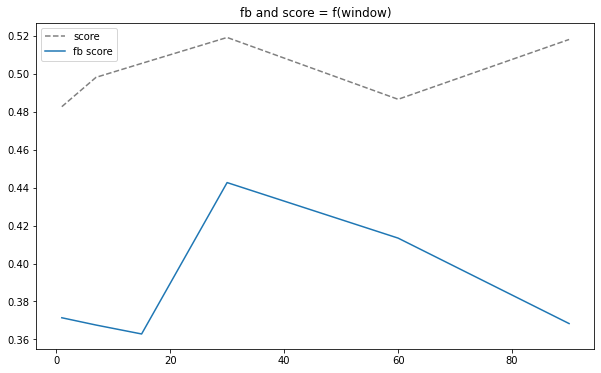

In [20]:
w_range = [1, 7, 15, 30, 60, 90]
fb_score = []
acc_score = []
for w in w_range:
    fb, acc = classif_scale_window(house2_power_blk1, house1_power_blk2, window=w, classifier=RandomForestClassifier(n_estimators=30, n_jobs=-1, max_samples=0.9, max_depth=12), scaler=QuantileTransformer())
    fb_score.append(fb)
    acc_score.append(acc)

plt.figure(figsize=(10, 6));
plt.plot(w_range, acc_score, label='score', color='grey', linestyle='dashed');
plt.plot(w_range, fb_score, label='fb score');
plt.legend();
plt.title('fb and score = f(window)');
